In [1]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('./data/processed_hybrid_df.csv')

# 데이터 확인
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,EMISSIONS,COMB (km/L),CITY (km/L),HWY (km/L)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,186,12.345679,10.869565,14.925373
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,175,13.157895,11.764706,15.384615
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,230,10.000000,8.196721,13.513514
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,264,8.695652,7.462687,10.869565
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,198,11.627907,10.000000,14.285714


# 통합된 곳에 넣어야할만한 것
최종목표: 차량 클래스와 연료의 최적(연비가 좋고 배출량이 적은)의 조합은 무엇일까? + 가격?

0. 하이브리드 차량 제거(drop) -> 하이브리드가 포함된 차량 클래스가 연비와 배출량이 좋기 때문에 해당 클래스가 다른 클래스와 비교했을 때 공정하지 못할 수 있음
-> 연료 유형별 비교가 목적이기 때문에 하이브리드는 공정하지 못함
(이건 전처리 ipynb 파일 마지막에 추가)
1. 차량별 연비 and 배출량 / 시각화?
2. 연료별 연비 and 배출량 / 시각회?
3. 차량,연료별 연비 중앙값 -> 중앙 값을 고른 이유 포함 -> 각 차량과 연료의 표본을 확인해보니 정규분포를 따르지 않는 연료가 존재 -> 극단값에 영향을 덜 받기 위해 중앙 값을 채택
4. 차량,연료별 Co2배출량 중앙값
5. 각 도표 + 시각화로 얻을 수 있었던 인사이트 도출

+a. 연료 유형별 L당 가격을 비교해 실용적인 기준 추가


In [2]:
# 차량 클래스별 평균 연비 계산 및 내림차순 정렬
veh_comb_sorted_df = df.groupby("VEHICLE CLASS", as_index=False)["COMB (km/L)"].median().sort_values(by="COMB (km/L)", ascending=False)
veh_comb_sorted_df

,VEHICLE CLASS,COMB (km/L)
8,STATION WAGON - SMALL,11.494253
0,COMPACT,11.111111
2,MID-SIZE,10.309278
9,SUBCOMPACT,10.204082
10,SUV - SMALL,10.204082
7,STATION WAGON - MID-SIZE,10.000000
3,MINICOMPACT,9.615385
12,TWO-SEATER,9.009009
4,MINIVAN,9.009009
1,FULL-SIZE,8.771930


In [3]:
# 차량 클래스별 평균 CO2 배출량 계산 및 내림차순 정렬
veh_co2_sorted_df = df.groupby("VEHICLE CLASS", as_index=False)["EMISSIONS"].median().sort_values(by="EMISSIONS", ascending=False)
veh_co2_sorted_df

,VEHICLE CLASS,EMISSIONS
14,VAN - PASSENGER,343.0
13,VAN - CARGO,315.0
6,PICKUP TRUCK - STANDARD,301.0
11,SUV - STANDARD,281.0
5,PICKUP TRUCK - SMALL,268.0
12,TWO-SEATER,258.0
1,FULL-SIZE,258.0
4,MINIVAN,253.0
3,MINICOMPACT,240.5
7,STATION WAGON - MID-SIZE,230.0


In [4]:
# 연료 유형별 평균 연비 계산 및 내림차순 정렬
fuel_comb_sorted_df = df.groupby("FUEL", as_index=False)["COMB (km/L)"].median().sort_values(by="COMB (km/L)", ascending=False)
fuel_comb_sorted_df

,FUEL,COMB (km/L)
0,D,10.929288
3,X,9.900990
4,Z,9.259259
2,N,5.917160
1,E,5.882353


In [5]:
# 연료 유형별 평균 CO2 배출량 계산 및 내림차순 정렬
fuel_co2_sorted_df = df.groupby("FUEL", as_index=False)["EMISSIONS"].median().sort_values(by="EMISSIONS", ascending=False)
fuel_co2_sorted_df

,FUEL,EMISSIONS
2,N,319.0
1,E,275.0
4,Z,248.0
0,D,246.0
3,X,235.0


In [6]:
# 그래프의 제목과 라벨을 한국어로 쓸 수 있게 폰트 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지
# Mac의 경우
#plt.rcParams['font.family'] = 'AppleGothic'

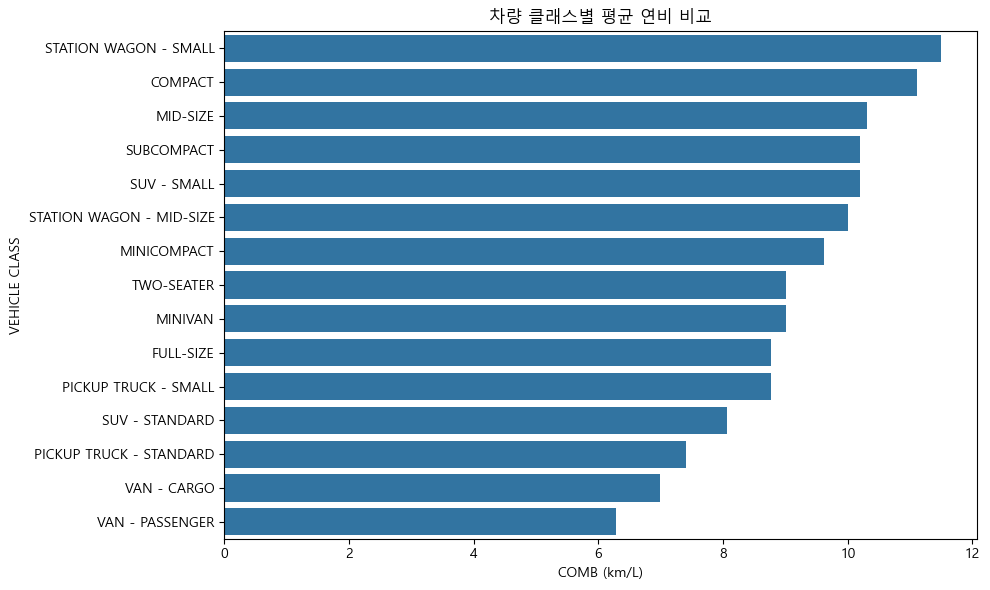

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=veh_comb_sorted_df, x="COMB (km/L)", y="VEHICLE CLASS")
plt.title("차량 클래스별 평균 연비 비교")
plt.tight_layout()
plt.show()

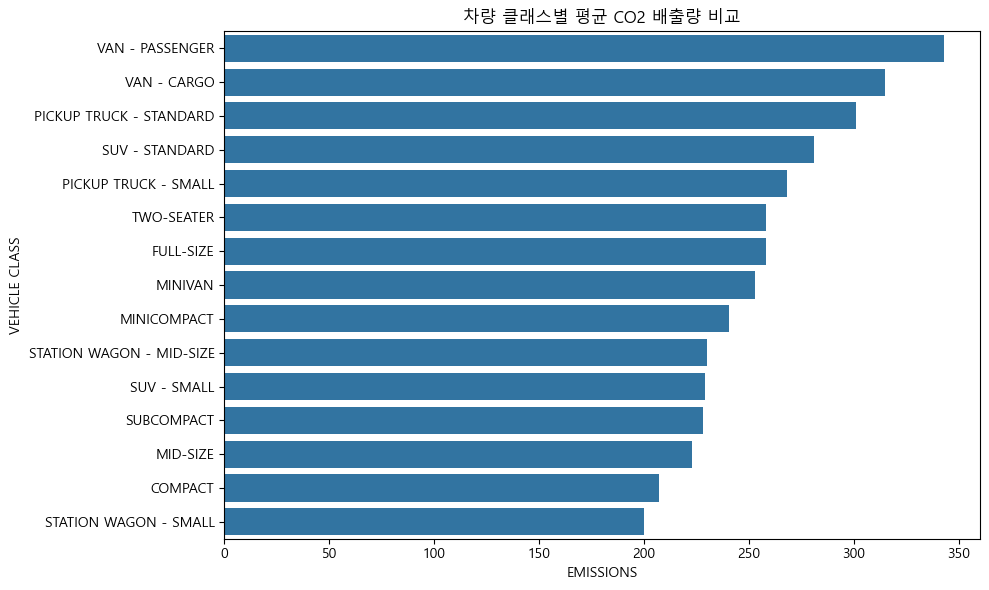

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=veh_co2_sorted_df, x="EMISSIONS", y="VEHICLE CLASS")
plt.title("차량 클래스별 평균 CO2 배출량 비교")
plt.tight_layout()
plt.show()

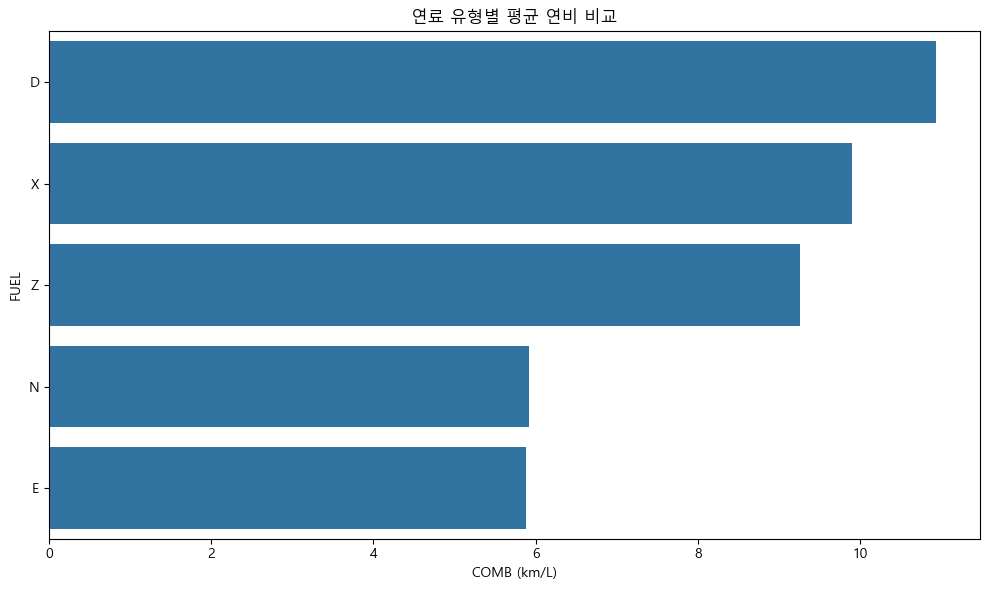

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=fuel_comb_sorted_df, x="COMB (km/L)", y="FUEL")
plt.title("연료 유형별 평균 연비 비교")
plt.tight_layout()
plt.show()

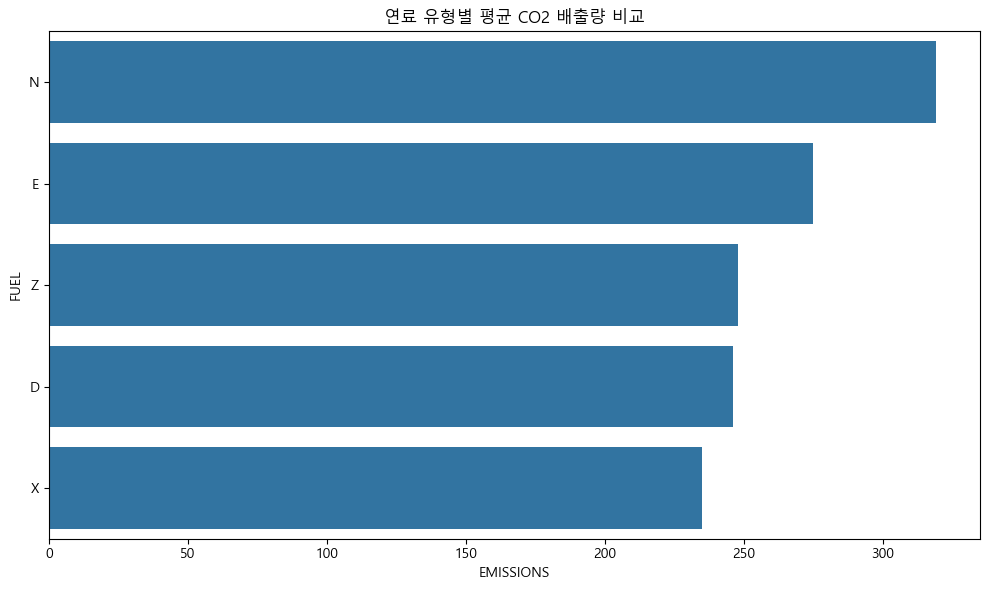

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=fuel_co2_sorted_df, x="EMISSIONS", y="FUEL")
plt.title("연료 유형별 평균 CO2 배출량 비교")
plt.tight_layout()
plt.show()

# 단일 컬럼 비교 시각화로 알 수 있는 사실들
1. 상위 3개 STATION WAGON - SMALL, COMPACT, MID-SIZE 가 1L당 11km대 정도로 가장 연비가 좋고, 
PICKUP TRUCK - STANDARD, VAN - CARGO, VAN - PASSENGER 가 1L당 6~7km대로 가장 연비가 안좋은 클래스다.
-> VAN, PICKUP TRUCK 같은 대형 차량들의 연비가 안좋고, STATION ~~, COMPACT같은 소형 차량들의 연비가 좋다.
2. 이하 동문
3. 이하 동문
4. 이하 동문

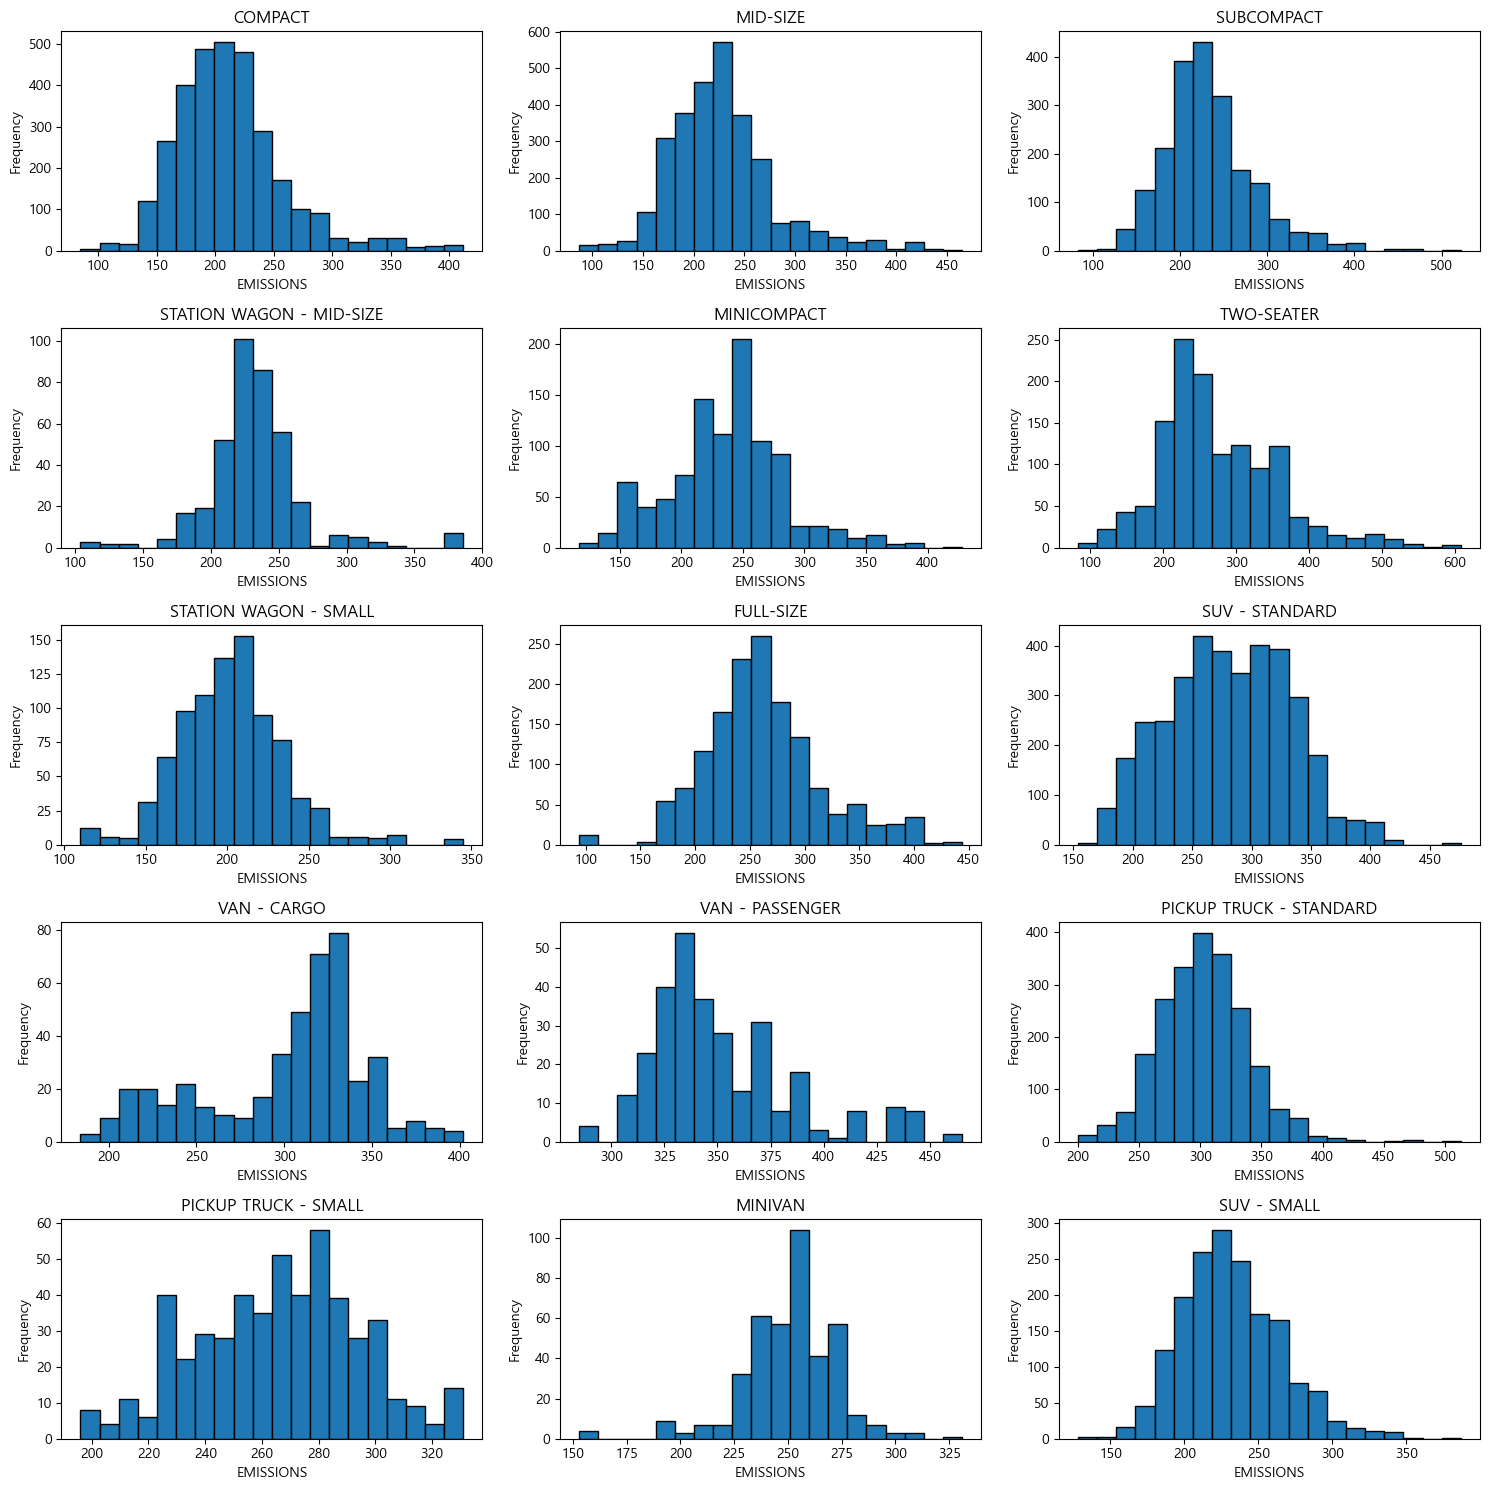

In [11]:
# 차량 클래스별 표본 분포 히스토그램 확인하기 -> 평균과 중앙 값중 어떤 것을 주요 지표로 할지 보기 위해..?
import matplotlib.pyplot as plt
import math

# 차량 클래스 종류 가져오기
car_types = df['VEHICLE CLASS'].unique()

# 한 줄에 몇 개의 그래프를 놓을지
cols = 3

# 필요한 행 개수 계산 (그래프 개수에 맞게)
rows = math.ceil(len(car_types) / cols) # 필요한 행 수 # math.ceil: 올림 함수로 car_types 개수에 맞게 3으로 나눠서 나눈 값을 올려 행 수로 지정

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3)) # figsize=(cols*5, rows*4): 한 그래프당 가로5 세로4

# 차량 클래스별로 반복
for i in range(len(car_types)):
    row = i // cols      # 몇 번째 행인지 # 만약 i가 0이면 0//3 = 0, i가 3이면 3//3 = 1 :목 계산
    col = i % cols       # 몇 번째 열인지 # 만약 i가 0이면 0%3 = 0, i가 2이면 2%3 = 2 : 나머지 계산

    sub = df[df['VEHICLE CLASS'] == car_types[i]] # df에서 차량클래스가 car_type에서 i번째 값과 같은 행만 가져와서 df형태인 sub로 반환
    axes[row][col].hist(sub['EMISSIONS'], bins=20, edgecolor='black')# axes[row][col].~ 형태는 row번째 행, col번째 열 위치에 히스토그램을 그림
    axes[row][col].set_title(car_types[i])
    axes[row][col].set_xlabel('EMISSIONS')
    axes[row][col].set_ylabel('Frequency')

# 남는 빈 그래프 제거
for j in range(len(car_types), rows * cols): # 차 종류 수부터 (차 종류수/3의 올린 값 곱하기 3)값 전까지 j에 넣음 -> range(15, 15/3 *3)
    row = j // cols # 몫 계산
    col = j % cols # 나머지 계산
    fig.delaxes(axes[row][col]) # fig.delaxes(axes[row][col]): 지정한 Figure에서 row번째 행, col번째 열에 위치한 그래프를 제거해라 

plt.tight_layout()
plt.show()


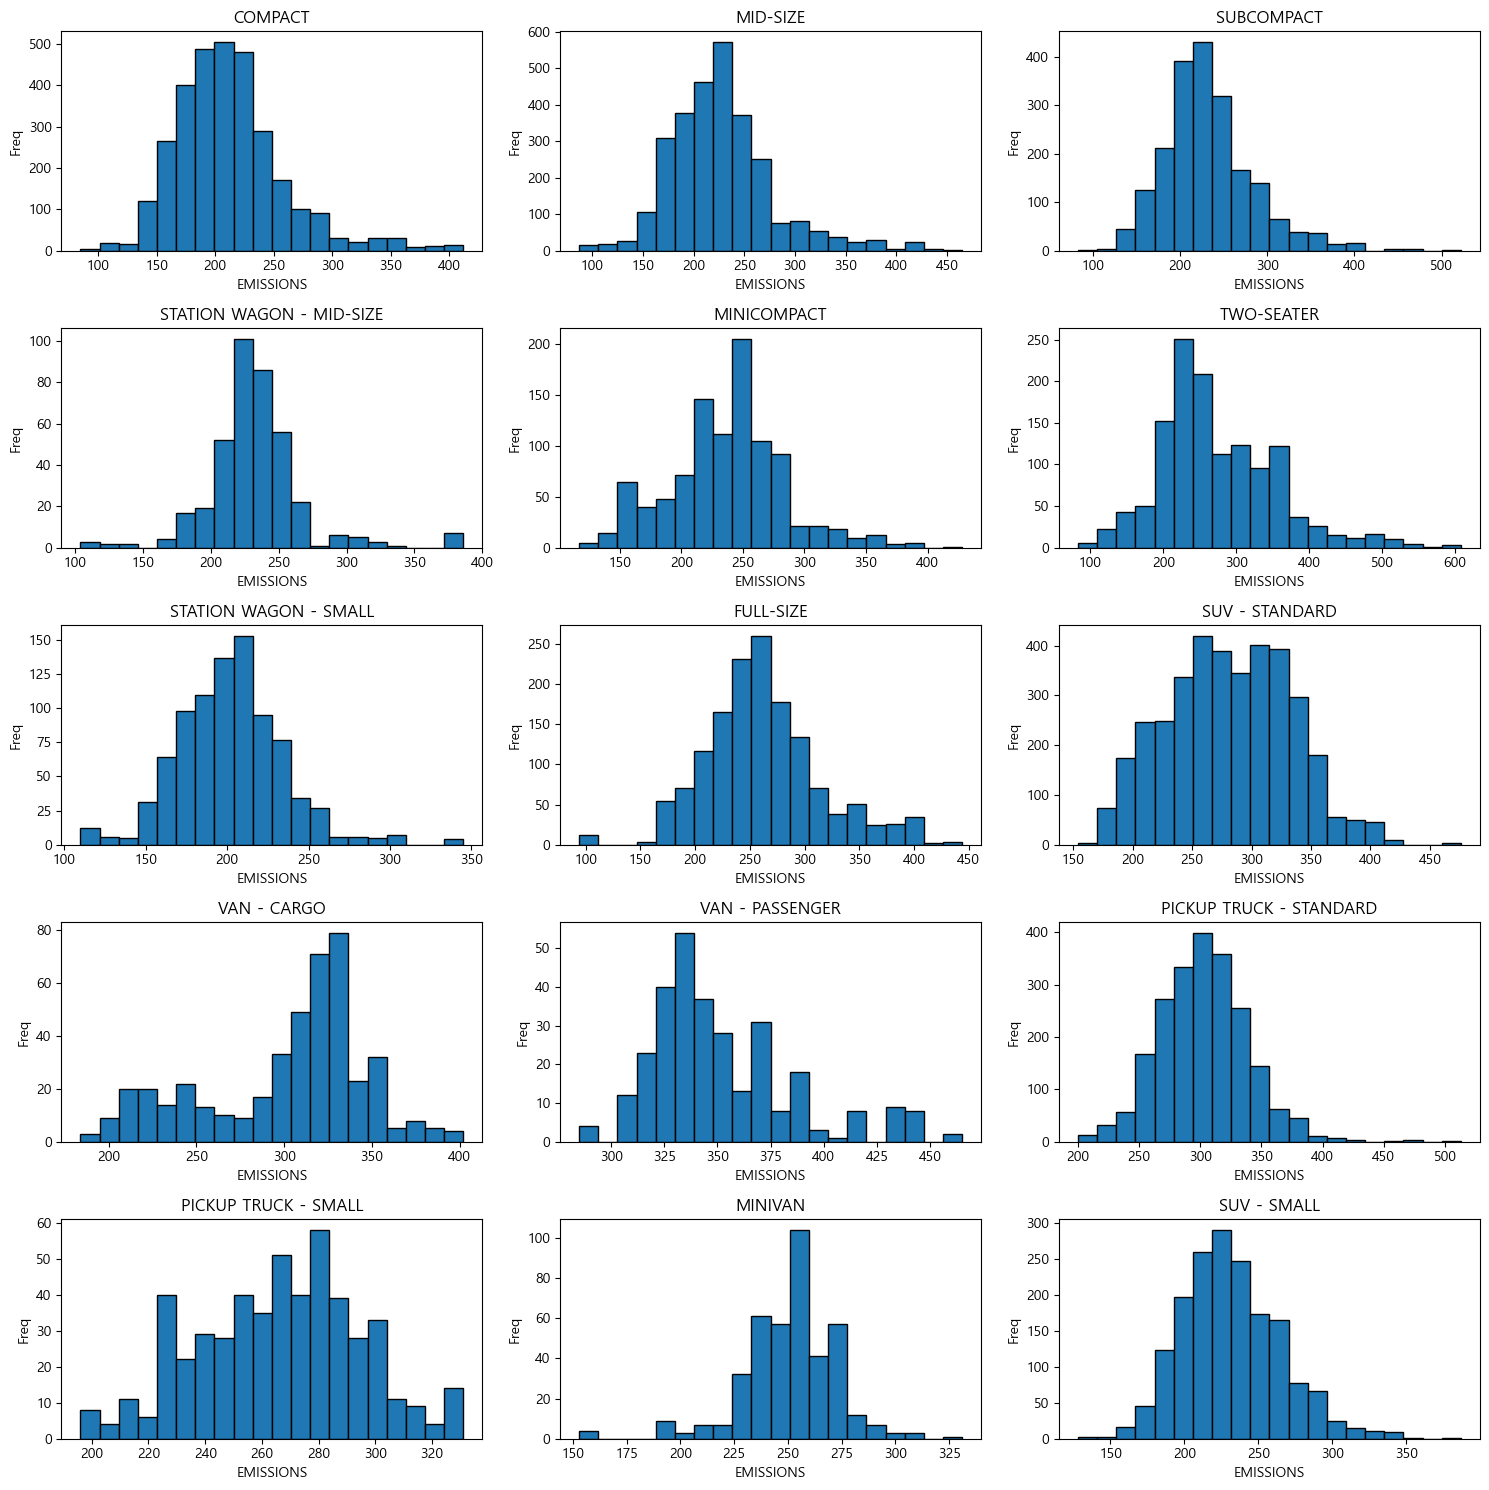

In [12]:
# 좀 더 짧은 그래프 통합 코드
import matplotlib.pyplot as plt
import math

car_types = df['VEHICLE CLASS'].unique()
n = len(car_types) 

cols = 3                      # 한 줄에 3개
rows = math.ceil(n / cols)    # 필요한 행 수 # math.ceil: 올림 함수로 car_types 개수에 맞게 3으로 나눠서 나눈 값을 올려 행 수로 지정

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3)) # figsize=(cols*5, rows*4): 한 그래프당 가로5 세로4
axes = axes.flatten()         # 2차원 → 1차원으로 다루기 쉽게

for i, car in enumerate(car_types): # enumerate(list): list에 든 값을 (0, 첫번째값), (1, 두번째값)... 형태로 바꿈 = (인덱스, 값)형태
    sub = df[df['VEHICLE CLASS'] == car] # df에서 차량클래스가 car(예를 들어, COMPACT)인 것만 행으로 가져와서 df형태인 sub로 반환
    axes[i].hist(sub['EMISSIONS'], bins=20, edgecolor='black') # axes[i].~ 형태는 i번째 그래프에 작동을 한다는 의미
    axes[i].set_title(car)
    axes[i].set_xlabel('EMISSIONS')
    axes[i].set_ylabel('Freq')

# 남는 subplot 제거
for j in range(i+1, len(axes)): # i는 subplot에서 사용한 마지막 인덱스 i+1부터는 사용하지 않음
    fig.delaxes(axes[j]) # fig.delaxes(ax): 지정한 Figure에서 ax 그래프 칸을 제거해라

plt.tight_layout()
plt.show()


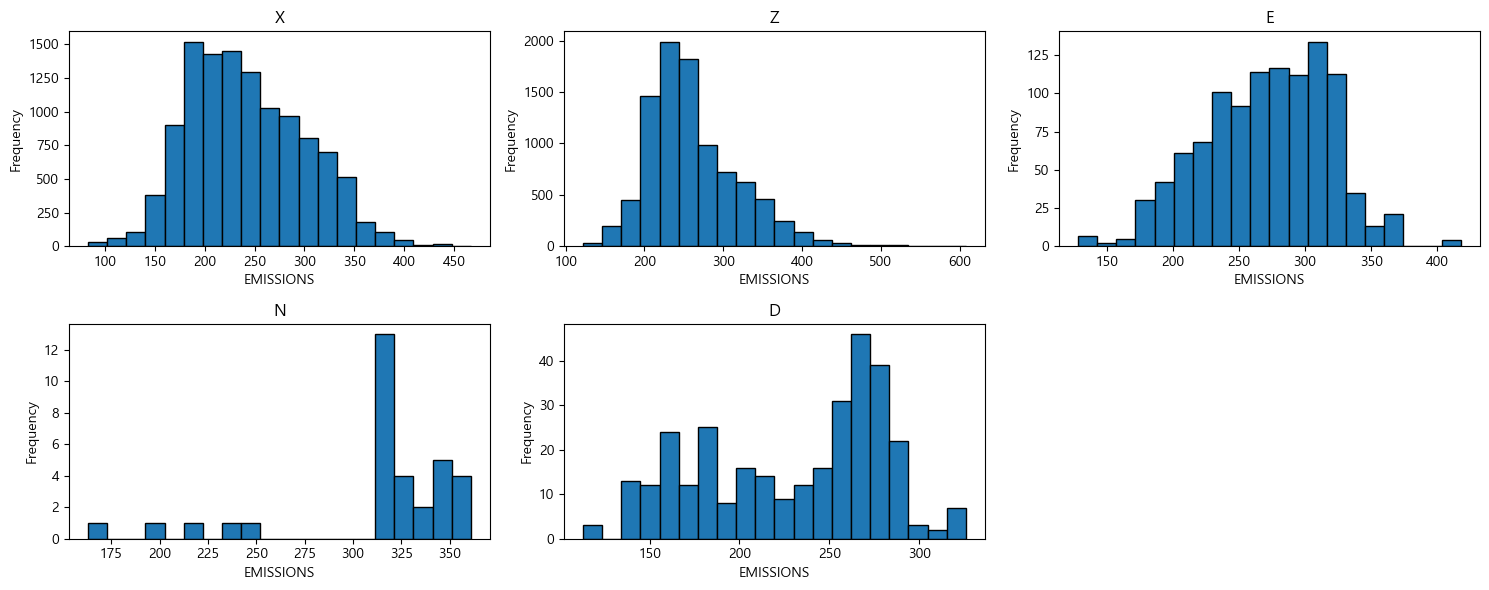

In [13]:
# 연료 유형별 표본 분포 히스토그램 확인하기 -> 평균과 중앙 값중 어떤 것을 주요 지표로 할지 보기 위해..?
import matplotlib.pyplot as plt
import math

# 연료 종류 가져오기
fuel_types = df['FUEL'].unique()

# 한 줄에 몇 개의 그래프를 놓을지
cols = 3

# 필요한 행 개수 계산 (그래프 개수에 맞게)
rows = math.ceil(len(fuel_types) / cols)

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))

# 차량 클래스별로 반복
for i in range(len(fuel_types)):
    row = i // cols      # 몇 번째 행인지
    col = i % cols       # 몇 번째 열인지

    sub = df[df['FUEL'] == fuel_types[i]]
    axes[row][col].hist(sub['EMISSIONS'], bins=20, edgecolor='black')
    axes[row][col].set_title(fuel_types[i])
    axes[row][col].set_xlabel('EMISSIONS')
    axes[row][col].set_ylabel('Frequency')

# 남는 빈 그래프 제거
for j in range(len(fuel_types), rows * cols):
    row = j // cols
    col = j % cols
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

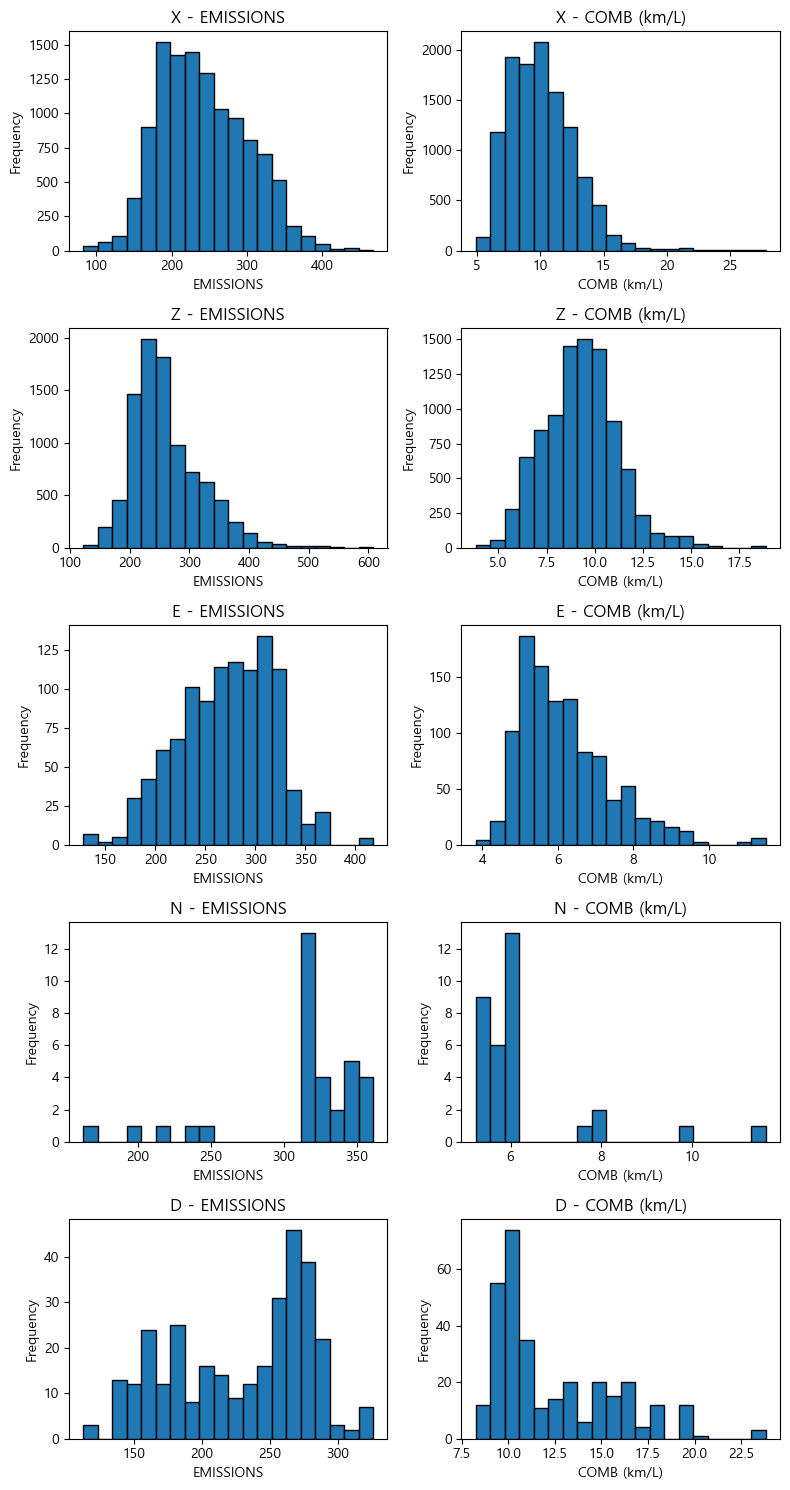

In [14]:
# 연료 유형별 복합연비와 배출량의 분포 동시에 히스토그램으로 확인하기
import matplotlib.pyplot as plt

# 연료 종류
fuel_types = df['FUEL'].unique()

# 행 = 연료 유형 수, 열 = 2 (CO2 / 연비)
rows = len(fuel_types)
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))

for i, fuel in enumerate(fuel_types):
    sub = df[df['FUEL'] == fuel]

    # 1️⃣ CO2 배출량
    axes[i, 0].hist(sub['EMISSIONS'], bins=20, edgecolor='black')
    axes[i, 0].set_title(f'{fuel} - EMISSIONS')
    axes[i, 0].set_xlabel('EMISSIONS')
    axes[i, 0].set_ylabel('Frequency')

    # 2️⃣ 연비
    axes[i, 1].hist(sub['COMB (km/L)'], bins=20, edgecolor='black')
    axes[i, 1].set_title(f'{fuel} - COMB (km/L)')
    axes[i, 1].set_xlabel('COMB (km/L)')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


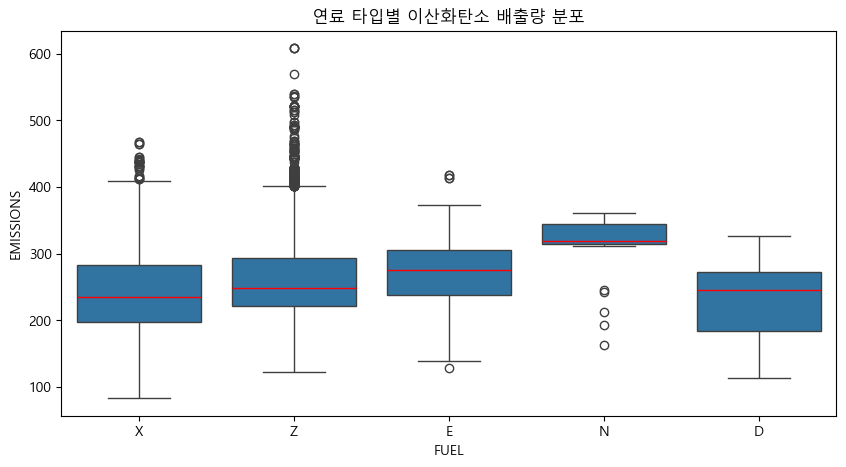

In [15]:
# 연료별 이산화 탄소 분포 박스플룻 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='FUEL', y='EMISSIONS', medianprops={'color': 'red'}) # medianprops: 중앙값선을 커스텀하는 함수
plt.title('연료 타입별 이산화탄소 배출량 분포')
plt.show()



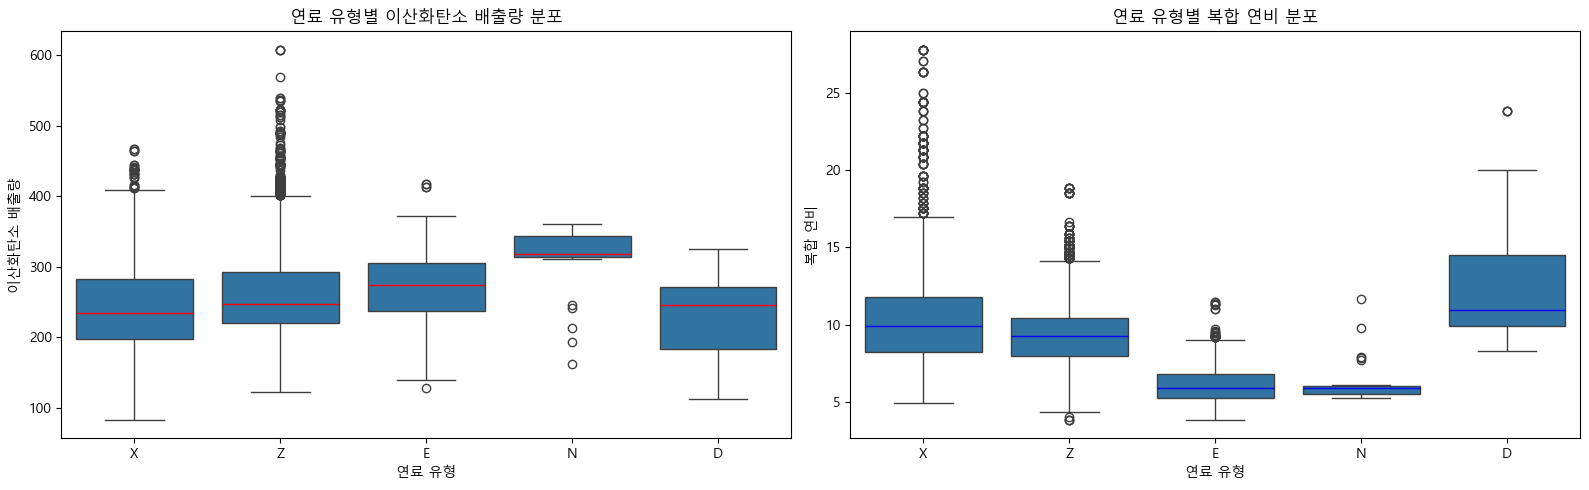

In [16]:
# 서브플룻으로 연료 유형별 복합연비, 배출량 박스풀룻 분포 보기
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ① 연료 유형별 이산화탄소 배출량
sns.boxplot(data=df, x='FUEL', y='EMISSIONS', ax=axes[0], medianprops={'color': 'red'})
axes[0].set_title('연료 유형별 이산화탄소 배출량 분포')
axes[0].set_xlabel('연료 유형')
axes[0].set_ylabel('이산화탄소 배출량')

# ② 연료 유형별 복합 연비
sns.boxplot(data=df, x='FUEL', y='COMB (km/L)', ax=axes[1], medianprops={'color': 'blue'})
axes[1].set_title('연료 유형별 복합 연비 분포')
axes[1].set_xlabel('연료 유형')
axes[1].set_ylabel('복합 연비')

plt.tight_layout()
plt.show()


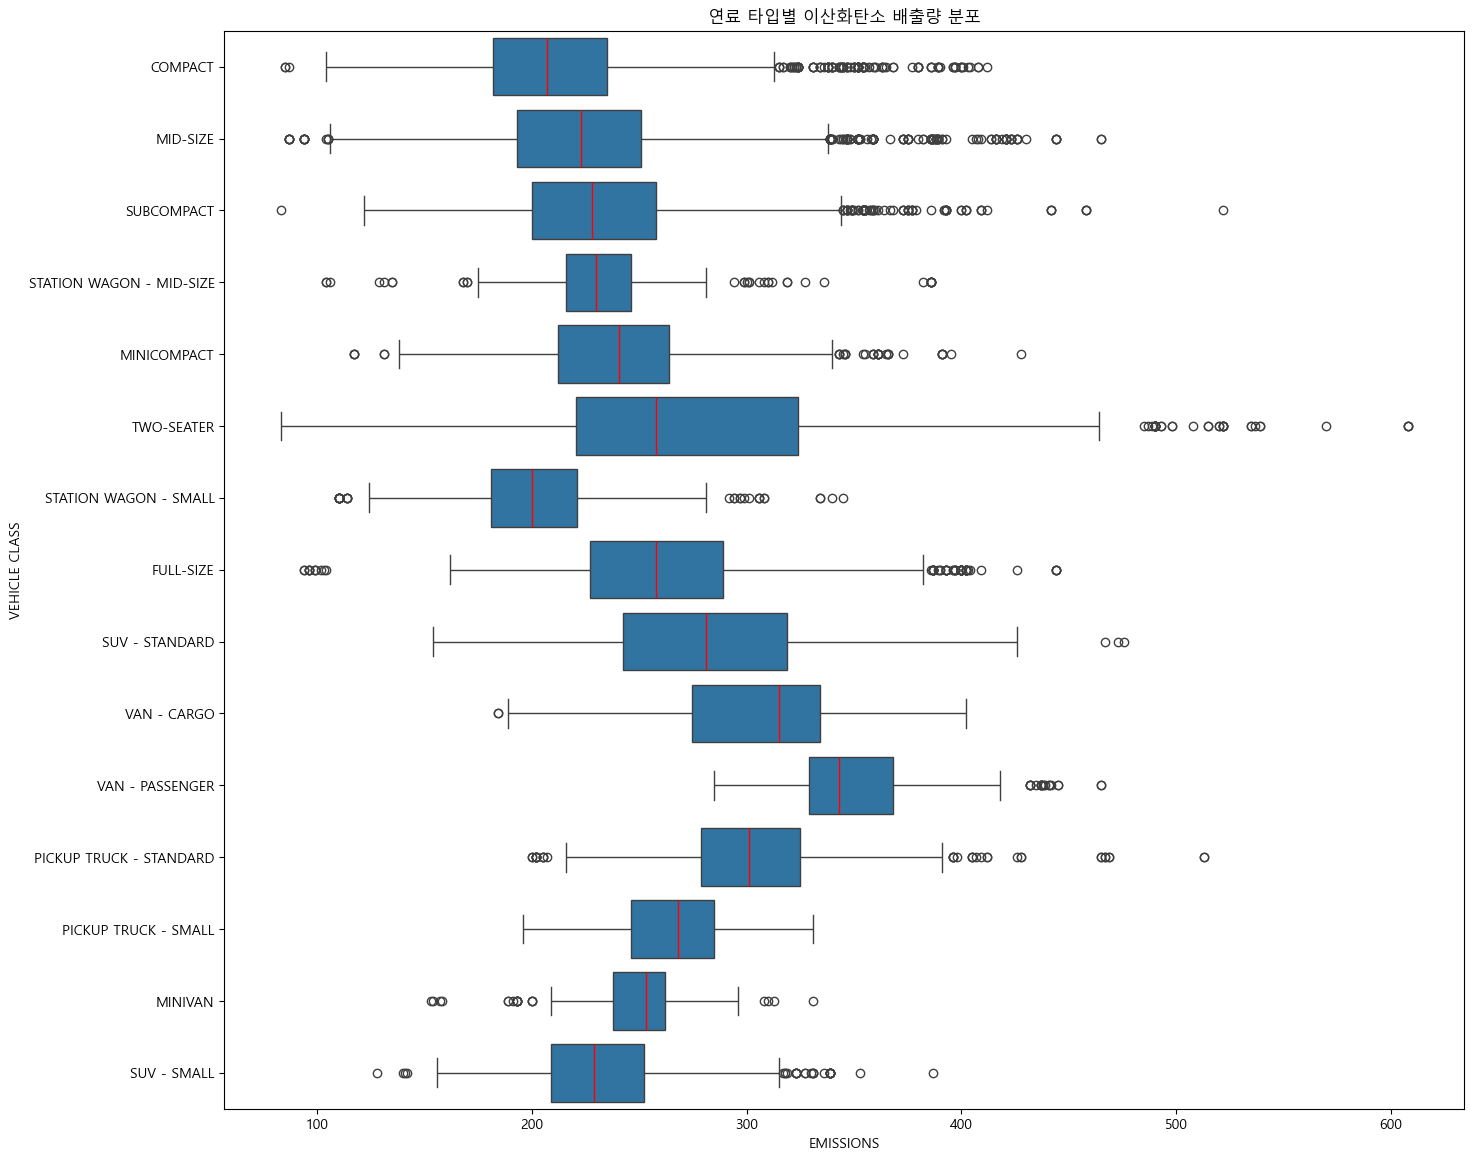

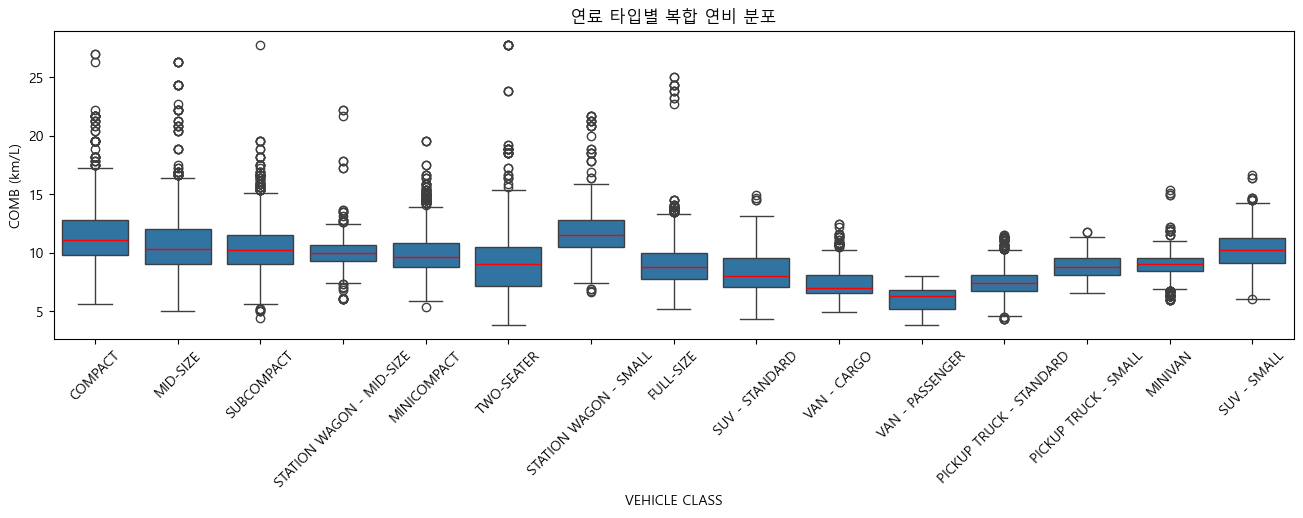

In [17]:
# 연료별 이산화 탄소 분포 박스플룻 연달아 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 14))
sns.boxplot(data=df, x='EMISSIONS', y='VEHICLE CLASS', medianprops={'color': 'red'}) # medianprops: 중앙값선을 커스텀하는 함수
plt.title('연료 타입별 이산화탄소 배출량 분포')
plt.show()

plt.figure(figsize=(16, 4))
sns.boxplot(data=df, x='VEHICLE CLASS', y='COMB (km/L)', medianprops={'color': 'red'}) # medianprops: 중앙값선을 커스텀하는 함수
plt.title('연료 타입별 복합 연비 분포')
plt.xticks(rotation=45)
plt.show()


# 시각화를 통해 얻을 수 있었던 것
1. N 연료의 분포가 극단값이 있어 평균보단 중앙값이 해당 표본 전체적인 경향성을 더 잘 나타내겠구나!?
2. 중앙값을 사용해야겠다!

3. 박스플룻을 보니 극단치가 꽤 있다 -> 01_전처리 과정에서 확인해보았을 때, 해당 극단값이 각 클래스당 특징을 반영할 것이라 생각해 지우지 않음 -> 근데 이러면 중앙값을 선택한게 모순?
-> 아니다. 차량 클래스별로 극단치는 해당 클래스의 극단치가 주는 특징을 반영할 수 있어 제거하지 않은 것이고, 전체적인 경향성을 파악할 때는 다수의 데이터를 중앙값이 더 잘 대표하기 때문에 모순되지 않는다.
번외. 모든 연료에서 복합연비 히스토그램이 좌로 치우쳐있는 패턴이 발견됨 -> 사실 아래 절대값을 봐야됨 -> 박스플룻으로 보면 잘 드러남
4. 


# 팀원들과 논의할점
1. 박스플룻과 히스토그램 중 어떤 것을 PPT에 넣을지
2. 박스플룻의 차량 클래스별 연비/배출량을 볼 때, 가로/세로 중 어떤 걸로 쓸지?
3. 박스풀룻과 히스토그램의 시각화 그래프 중
- 연비/배출량 둘 다 나타낸 그래프
- 연비만
- 배출량만
나타낸 그래프들 중 어떤 것을 사용할지?
4. 

In [18]:
# 피벗 테이블 생성

import pandas as pd

#df.groupby(['VEHICLE_CLASS_GROUP', 'FUEL'])[['EMISSIONS', 'COMB (km/L)']].mean()
pivot = pd.pivot_table(
    df, 
    index='VEHICLE CLASS', 
    columns='FUEL', 
    values=['EMISSIONS', 'COMB (km/L)'], 
    aggfunc='median'
)
pivot


COMB (km/L)                                  \
FUEL                               D         E          N          X   
VEHICLE CLASS                                                          
COMPACT                    16.393443  8.696310  11.627907  12.345679   
FULL-SIZE                  11.904762  6.896552   7.752404   9.803922   
MID-SIZE                   13.333333  7.752404   7.874016  11.627907   
MINICOMPACT                      NaN       NaN        NaN  12.579114   
MINIVAN                          NaN  6.410520        NaN   9.090909   
PICKUP TRUCK - SMALL        9.615385  6.993177        NaN   8.695652   
PICKUP TRUCK - STANDARD    10.101010  5.665768   5.464481   7.633588   
STATION WAGON - MID-SIZE   13.513514  6.993007        NaN  10.416667   
STATION WAGON - SMALL      15.873016       NaN        NaN  12.195122   
SUBCOMPACT                 16.949153  7.936508   9.803922  11.235955   
SUV - SMALL                12.345679  7.221064        NaN  10.416667   
SUV - STANDARD             10.000000  5.780347        NaN   8.620690   
TWO-SEATER                 23.809524       NaN        NaN  14.095692   
VAN - CARGO                      NaN  5.235602   5.952381   7.142857   
VAN - PASSENGER                  NaN  4.842643   5.917160   6.622517   

                                    EMISSIONS                              
FUEL                              Z         D      E      N      X      Z  
VEHICLE CLASS                                                              
COMPACT                   10.000000     165.0  186.0  163.0  186.0  230.0  
FULL-SIZE                  8.196721     227.0  234.0  244.0  237.0  282.0  
MID-SIZE                   9.259259     202.0  206.5  213.0  198.0  248.0  
MINICOMPACT                9.478886       NaN    NaN    NaN  186.0  244.0  
MINIVAN                    9.174312       NaN  249.5    NaN  253.0  251.0  
PICKUP TRUCK - SMALL            NaN     280.0  229.5    NaN  267.0    NaN  
PICKUP TRUCK - STANDARD    6.993007     265.0  286.0  346.0  304.0  332.0  
STATION WAGON - MID-SIZE   9.708738     200.0  229.0    NaN  221.0  237.0  
STATION WAGON - SMALL     10.526316     170.0    NaN    NaN  192.0  221.0  
SUBCOMPACT                 9.803922     159.0  202.0  193.0  205.0  235.0  
SUV - SMALL                9.803922     218.0  226.5    NaN  224.0  238.5  
SUV - STANDARD             7.575758     270.0  283.0    NaN  267.0  306.0  
TWO-SEATER                 8.928571     113.0    NaN    NaN  164.0  260.0  
VAN - CARGO                9.132611       NaN  306.0  318.0  322.0  254.0  
VAN - PASSENGER                 NaN       NaN  331.0  319.0  350.0    NaN

# 메모
1. 그래프 이쁘게 만드는 것도 중요하다
    1-1. 연비는 클수록 '좋은거'니까 파랑계열, 배출량은 클루숙 '안좋은거'니까 빨강계열
    1-2. 텍스트 박스 만들어서 x, y축을 대신하는 라벨 표기
    1-3. 오른쪽에 범주 옆에 단위 추가
    1-4. null값 있으면 색칠하지 않고 빈 공칸으로 냅두기 -> 기본값도 색칠안하는 것 같음

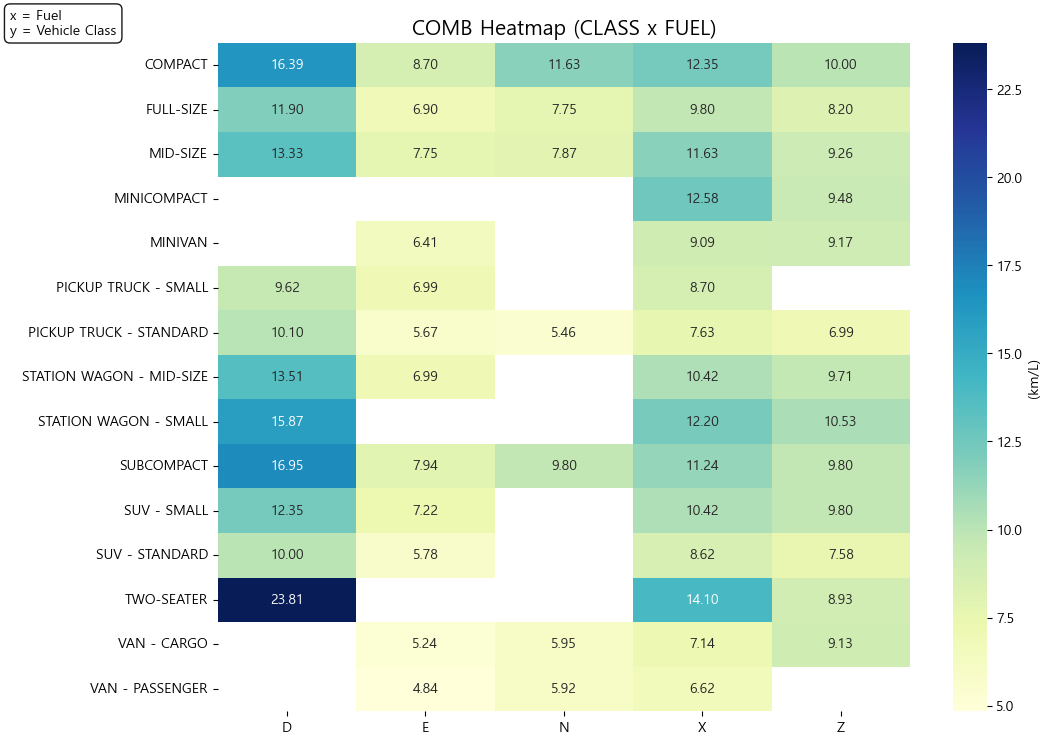

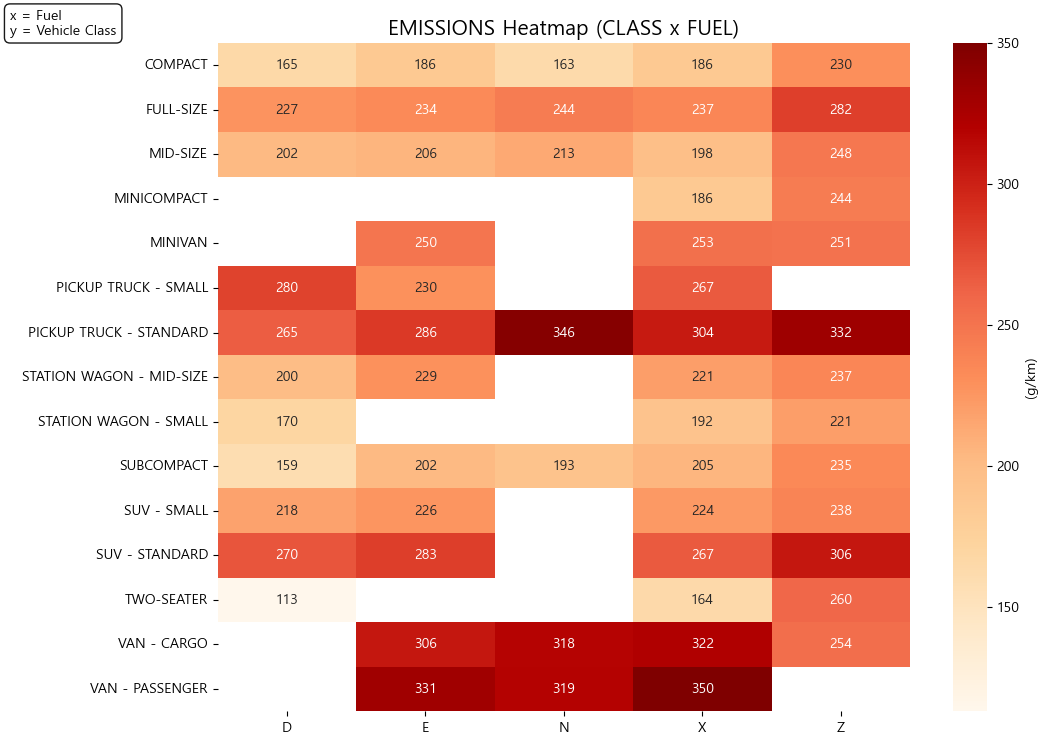

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#=============
# 연비 히트맵
# ============
plt.figure(figsize=(11,7.5))
comb_map = sns.heatmap(pivot['COMB (km/L)'], annot=True, cmap="YlGnBu", mask=pivot['COMB (km/L)'].isnull(), fmt='.2f', cbar_kws={'label': '(km/L)'})

# annot으로 박스 안에 값 표기 여부 결정
# cmap으로 색깔 설정
# NaN 값은 mask(빈칸)처리
# 1.8e+02 같은 소수점 없이 깔끔한 계산값 도출


comb_map.set_xlabel("")
comb_map.set_ylabel("")
# x라벨, y라벨이 잘 안 보여서, 원래 라벨은 없애고 인덱스 상자 만들어보기
box_text = "x = Fuel\ny = Vehicle Class"
box = dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='black', alpha=0.9)

comb_map.text(-0.3, 1.05, box_text, transform=comb_map.transAxes, fontsize=10, verticalalignment='top', bbox=box)
# transform=__.transAxes : (x, y) 좌표를 0~1 사이 값으로 위치 지정
# transAxes : x=0 → 왼쪽,  x=1 → 오른쪽,  y=0 → 아래쪽,  y=1 → 위쪽
# verticalalignment='top' : y값을 위쪽 기준으로 배치


plt.title("COMB Heatmap (CLASS x FUEL)",fontsize=15)
plt.tight_layout()
plt.show()


#==============
# 배출량 히트맵
# =============

plt.figure(figsize=(11,7.5))
emissions_map = sns.heatmap(pivot['EMISSIONS'], annot=True, cmap="OrRd", mask=pivot['EMISSIONS'].isnull(), fmt=".0f", cbar_kws={'label': '(g/km)'})


emissions_map.set_xlabel("")
emissions_map.set_ylabel("")
emissions_map.text(-0.3, 1.05, box_text, transform=emissions_map.transAxes, fontsize=10, verticalalignment='top', bbox=box)
plt.title("EMISSIONS Heatmap (CLASS x FUEL)",fontsize=15)
plt.tight_layout()
plt.show()


# 히트맵 시각화로 알 수 있는 사실 및 인사이트
1.
2.
3.
4.
5.


1. 특정 차량 클래스에서 안쓰이는 연료 유형이 존재한다.
-> 왜 그럴까? ex) 효율 좋은 디젤을 사용하면 안될까? -> 도메인 지식으로 연결 (ex. MINICOMPACT엔 왜 디젤 연료 모델이 없는지?)

2. TWO-SEATER에서 D연료를 사용할 때 연비가 매우좋다
 -> 직접 TWO-SEATER에서 D연료를 사용하는 행을 확인해봄
 -> FORTWO와 FORTWO CDI CABRIOLET라는 모델 단 두가지, 총 3개 값(행)이 나옴
 -> 의문점 : 이 3개의 값이 과연 "TWO-SEATER에서 D연료를 사용할 때 연비가 매우좋다"라는 것을 뒷받침해서 일반화하는 근거가 되도 괜찮을까?
 -> 표본 수가 10개(예시) 이상인 값만 필터링?

 주의사항으로 발표때 언급하기
TWO-SEATER에서 D연료를 사용할 때 연비가 매우 좋다고 하기엔 어렵지만,
TWO-SEATER 중 FORTWO 모델은 D연료를 사용할 때 연비가 매우 좋다.

+ TWO-SEATER 특성상 2인승에 매우 가벼운 모델인 FORTWO같은 차량과 부가티의 스포츠카 같은 차량이 같이 있어서 클래스 안에서 연비/배출량 차이가 많이 난다.
+ 심지어 TWO-SEATER + 디젤 연료 조합은 표본수가 3개라 매우 극단적이다.


3. 모든 차량 클래스에서 D연료의 평균 연비가 가장 효율적이다.
-> 연비 측면에서 친환경 차량 개발에 연료는 D연료를 쓰는 것이 좋다

4. PICKUP TRUCK - STANDARD 빼고 모든 클래스에서 E(에탄올)연료의 연비가 가장 비효율적이다.
-> E연료를 쓰는 차량들의 연비를 개선 시키면 (다른 연료를 쓰는 차량을 개선시키는 것보다 효율이) 좋을 것이다.

5. CO₂ 배출량 측면에서는 Z 연료가 대부분의 차량 클래스에서 가장 높았다

6. D 연료는 대부분의 클래스에서 CO₂ 배출량이 가장 낮거나 낮은 편이다

7. 차량이 대형일수록 연료 선택에 따른 CO₂ 배출량 차이가 커진다?

8. 

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
# 인사이트 도출할 때 유의하거나 필요한 도메인 지식
1. 디젤이 없는 차량들의 이유?
2. 각 연료들의 특성
    D(디젤) : Co2 배출량은 낮지만, 질소산화물과 (미세먼지?) 배출이 많아 환경문제가 심함
    X(가솔린/휘발유) : 무난하게 많이쓰임 , 데이터셋에선 대부분 클래스 * 연비/배출량 측면에서 상위권(1,2위)였고 중'대형 클래스에선 하위권이었음
    N(천연가스) : 천연가스는 기체형태임.
    Z(고급가솔린) : 데이터상으론 전체적으로 비효율적임
    E(에탄올): 발유에 식물(옥수수, 사탕수수 등)에서 추출한 알코올인 에탄올을 85%나 섞은 연료, 나머지 15%는 휘발유다. 에탄올은 '탄소 중립' 이라는 도메인 지식이 있어야 함
    탄소 중립 : 에탄올을 사용할 때 발생하는 Co2의 배출량은 적은편지 아니지만, 에탄올 자체의 원료가 식물이기 때문에, 식물이었을 때 광합성으로 탄소를 없앤 것을 인정해 주는 방식
3.
4.
5.


ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
# 총정리 멘트
"특히 D 연료는 대부분의 차량 클래스에서 높은 연비와 낮은 CO₂ 배출량을 동시에 보였다.
(“차급별로 연료 전략을 달리해야 할 것 같지만, 실제 데이터에서는 연료 자체의 특성이 더 지배적이었다.”)
다만 디젤의 환경적 부작용과 규제 이슈를 고려할 때, 단기적으로는 대형 차급 중심의 연료 효율 개선 전략이 효과적이며,
중장기적으로는 디젤의 장점을 대체할 수 있는 친환경 연료 개발이 필요하다."

..추가해야 함




In [ ]:
worst_5 = (df.groupby(["VEHICLE CLASS", "FUEL"])["EMISSIONS"].median().sort_values(ascending=False).head(5))
worst_5

# 결과 해석
# 차량 / 연료 별 조합 중 가장 배출량이 높은 5개를 출력한 것 -> 해당 5개의 조합을 개선하면 배출량 개선 효율의 절댓값이 높아서 효과가 크다

VEHICLE CLASS            FUEL
VAN - PASSENGER          X       350.0
PICKUP TRUCK - STANDARD  N       346.0
                         Z       332.0
VAN - PASSENGER          E       331.0
VAN - CARGO              X       322.0
Name: EMISSIONS, dtype: float64

# 추가적인 가격 기준 확장

In [ ]:
# 국제유가 (GlobalPetrolPrices.com) (2026-01-26, south korea 기준)
    # 가솔린 $1.289, 디젤 $1.208, LPG $0.759  (E85 가격 없음)
# 고급휘발유 (https://www.opinet.co.kr/user/glopNopdView.do#) (1월 2주차 기준)
    # 보통휘발유, 고급휘발유 모두 표시되어 있는 국가 (일본, 캐나다, 한국)
    # 3개 국가의 평균 가격 차이의 펴센트 = 13.79%
    # 한국 기준 = 13.61%
    # 고급휘발유 = $1.289 * 1.1361 = $1.464
# E85는 에너지 밀도가 낮아서, 가솔린보다 연비가 약 15~25% 정도 떨어짐
    # USA 기준 가솔린 $0.849, 디젤 $0.957, E85 $0.608  (LPG 가격 없음)
# 한국에서는 E85 연료를 사용하지 않음 (전세계적으로 봐도 E85 연료를 판매하는 나라는 7개국(USA, 브라질, 태국, 프랑스, 스웨덴, 스위스, 스페인))
    # 국제 에탄올 가격 $1.62/갤런, 1갤런 = 3.785, 유류세 달러 환산 $0.4 ~ $0.45(교통세 + 교육세 + 주행세 포함), 마진 $0.05~0.08, 부가세 10%
    # (($1.62/3.785) + $0.45 + $0.05) * 1.1 = 약 $1.02
# 총 정리
    # 일반 가솔린(X) = $1.289, 고급 가솔린(Z) = $1.464, 디젤(D) = $1.208, 에탄올(E) = $1.02, 


# 다시다시
    # 천연가스와 LPG는 다른 것
        # 천연가스
            # 메탄(CH4)이 주 성분으로 공기보다 가벼움 (가스)
        # LPG
            # 프로판(C3H8), 부탄(C4H10)이 주 성분으로 공기보다 무거움 (원유를 정제하는 과정에서 나오는 부산물)

# 모두 판매 중인 나라는 USA (GlobalPetrolPrices.com)
    # 고급 가솔린(Z) $0.966/L, 일반 가솔린(X) $0.849/L, 디젤(D) $0.957/L, 천연가스(N) $0.00049/L, 에탄올(E) $0.608/L
    # 천연가스(N) $0.047/kWh -> $0.00049/L
        # 1kWh = $0.047
        # (기압 1atm, 온도 섭씨 0도 기준) 1kWh = 95.2L (기체 상태 기준)
        # $0.047 / 95.2L = 0.00049달러/L
    # 고급휘발유 (https://www.opinet.co.kr/user/glopNopdView.do#) (1월 2주차 기준)
        # 보통휘발유, 고급휘발유 모두 표시되어 있는 국가 (일본, 캐나다, 한국)
            # Octane(91~94), Octane(98이상)
        # 3개 국가의 평균 가격 차이의 펴센트 = 13.79%
        # $0.849 * 1.1379 = $0.966


# 천연가스 가격 재정립 필요!!

In [25]:
# 기름 가격 매핑
fuel_prices = {
    'Z': 0.966,     # 고급 가솔린
    'X': 0.849,     # 일반 가솔린
    'D': 0.957,     # 디젤
    'N': 0.00049,   # 천연가스
    'E': 0.608      # 에탄올
}

In [26]:
# 기름 단위 가격 이라는 새 컬럼 생성
df['fuel_unit_price'] = df['FUEL'].map(fuel_prices)

In [27]:
# 1000km 당 연료 비용 이라는 새 컬럼 생성
df['cost_1000km'] = (1000 / df['COMB (km/L)']) * df['fuel_unit_price']    # 1000km는 일반적인 한 달 평균 주행거리..?

In [28]:
pivot_cost = df.pivot_table(
    values='cost_1000km',
    index='VEHICLE CLASS',
    columns='FUEL',
    aggfunc='median'
).round(2) # 소수 둘째자리까지만 출력

pivot_cost

FUEL,D,E,N,X,Z
VEHICLE CLASS,,,,,
COMPACT,58.38,69.92,0.04,68.77,96.60
FULL-SIZE,80.39,88.16,0.06,86.60,117.85
MID-SIZE,71.77,78.43,0.06,73.01,104.33
MINICOMPACT,NaN,NaN,NaN,67.50,101.91
MINIVAN,NaN,94.85,NaN,93.39,105.29
PICKUP TRUCK - SMALL,99.53,87.25,NaN,97.64,NaN
PICKUP TRUCK - STANDARD,94.74,107.31,0.09,111.22,138.14
STATION WAGON - MID-SIZE,70.82,86.94,NaN,81.50,99.50
STATION WAGON - SMALL,60.29,NaN,NaN,69.62,91.77


In [ ]:
# 가장 싼 가격 조합 10개 확인
best_cost_group = df.groupby(["VEHICLE CLASS", "FUEL"])["cost_1000km"].median().sort_values().round(2).head(10)
best_cost_group

VEHICLE CLASS            FUEL
COMPACT                  N        0.04
SUBCOMPACT               N        0.05
MID-SIZE                 N        0.06
FULL-SIZE                N        0.06
VAN - CARGO              N        0.08
VAN - PASSENGER          N        0.08
PICKUP TRUCK - STANDARD  N        0.09
TWO-SEATER               D       40.19
SUBCOMPACT               D       56.46
COMPACT                  D       58.38
Name: cost_1000km, dtype: float64

# 시간나면 수행
